In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read csv file for Food Items of sueatable
input_file = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Github-SustainableFoodDB/Data/Food_Items_CF_clean_1.csv')

In [3]:
input_file

,FOOD COMMODITY GROUP,FOOD COMMODITY TYPOLOGY,FOOD COMMODITY TYPOLOGY updated,FOOD COMMODITY sub-TYPOLOGY,FOOD COMMODITY ITEM,FOOD COMMODITY ITEM updated,SYNONYMS,URL,n,mean,...,Q1,Q3,CV,skewness,kurtosis,Shapiro Wilk test P,FLAG 1 (SIZE),FLAG 2 (outlier),FLAG 3 (adherence to the normal distribution),Suggested CF value to represent food commodity
0,AGRICULTURAL PROCESSED,BEER,BEER,-,BEER IN CAN,BEER IN CAN,NaN,NaN,5,0.69,...,0.58,0.77,0.2,0.878,2.62,0.329,Y,G,G,ITEM
1,AGRICULTURAL PROCESSED,BEER,BEER,-,BEER IN GLASS,BEER IN GLASS,NaN,NaN,9,1.03,...,0.67,1.17,0.5,1.117,3.412,0.275,G,G,G,ITEM
2,AGRICULTURAL PROCESSED,BEER,BEER,-,BEER MODULAR CAN,BEER MODULAR CAN,NaN,NaN,5,0.54,...,0.52,0.58,0.06,0.273,1.354,0.394,Y,G,G,ITEM
3,AGRICULTURAL PROCESSED,BISCUITS,BISCUIT,-,CHOCOLATE OR CREAM FILLED COOKIES,CHOCOLATE CREAM COOKY,NaN,NaN,9,1.69,...,1.45,1.69,0.23,1.126,2.554,0.005,G,G,R,ITEM
4,AGRICULTURAL PROCESSED,BISCUITS,BISCUIT,-,SIMPLE COOKIES,COOKY,NaN,NaN,12,1.50,...,1.25,1.60,0.23,1.183,3.6,0.078,G,G,G,ITEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,FISHING,SHELLFISH,SHELLFISH,CRUSTACEAN* (SUB-TYP) (PRAWN/SHRIMP),PRAWN,PRAWN,NaN,NaN,18,11.95,...,5.24,16.78,0.87,1.282,3.37,0.001,G,G,R,ITEM
298,FISHING,SHELLFISH,SHELLFISH,CRUSTACEAN* (SUB-TYP) (PRAWN/SHRIMP),SHRIMP,SHRIMP,NaN,NaN,18,11.95,...,5.24,16.78,0.87,1.282,3.37,0.001,G,G,R,ITEM
299,FISHING,SHELLFISH FROZEN,SHELLFISH FROZEN,-,OCTOPUS (F),OCTOPUS FROZEN,NaN,NaN,1,7.88,...,7.88,7.88,-,-,-,n.a.,R,G,R,TYPOLOGY
300,FISHING,SHELLFISH FROZEN,SHELLFISH FROZEN,-,SHRIMP (F),SHRIMP FROZEN,NaN,NaN,4,17.73,...,6.85,25.95,0.68,0.348,1.461,0.381,Y,G,G,ITEM


In [4]:
group = input_file['FOOD COMMODITY GROUP'].unique()
group

array(['AGRICULTURAL PROCESSED', 'ANIMAL HUSBANDRY', 'CROPS', 'FISHING'],
      dtype=object)

In [5]:
import pandas as pd

results = []

for g in group:
    group_data = input_file[input_file['FOOD COMMODITY GROUP'] == g]
    uniq_food_typology = group_data['FOOD COMMODITY TYPOLOGY updated'].nunique()
    food_typology_list = group_data['FOOD COMMODITY TYPOLOGY updated'].unique()
    uniq_food_item = group_data['FOOD COMMODITY ITEM updated'].nunique()
    food_item_list = group_data['FOOD COMMODITY ITEM updated'].unique()
    
    results.append({'Group': g, 'Typology': food_typology_list, 'Typology Count': uniq_food_typology, 
                    'Item': food_item_list, 'Item Count': uniq_food_item})

results_df = pd.DataFrame(results, columns=['Group', 'Typology', 'Typology Count', 'Item', 'Item Count'])
results_df


,Group,Typology,Typology Count,Item,Item Count
0,AGRICULTURAL PROCESSED,"[BEER, BISCUIT, WATER, BREAD, BREAKFAST CEREAL...",33,"[BEER IN CAN, BEER IN GLASS, BEER MODULAR CAN,...",98
1,ANIMAL HUSBANDRY,"[BEEF, BUFFALO, BUTTER, CHEESE FRESH, CHEESE H...",19,"[BEEF BONE FREE, BEEF WITH BONE, BUFFALO BONE ...",45
2,CROPS,"[COFFEE, DRY FRUIT, FRUIT HEATED GREENHOUSE, F...",15,"[COFFEE GREEN, DATE, RAISIN, EXOTIC FRUIT, COC...",97
3,FISHING,"[FISH, FISH FROZEN, FISH PROCESSED, SHELLFISH,...",5,"[ALFONSINO, ANCHOVY, ANGLERFISH, CARP, CATFISH...",62


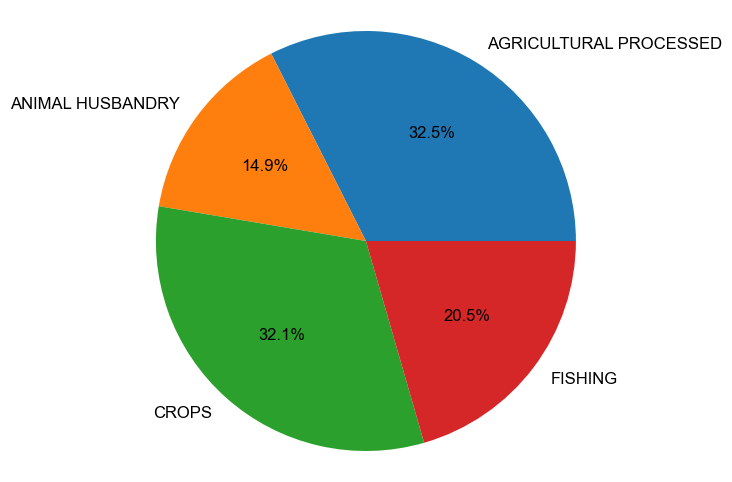

In [7]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.pie(results_df['Item Count'], labels=results_df['Group'], autopct='%1.1f%%')
plt.axis('equal')

plt.show()

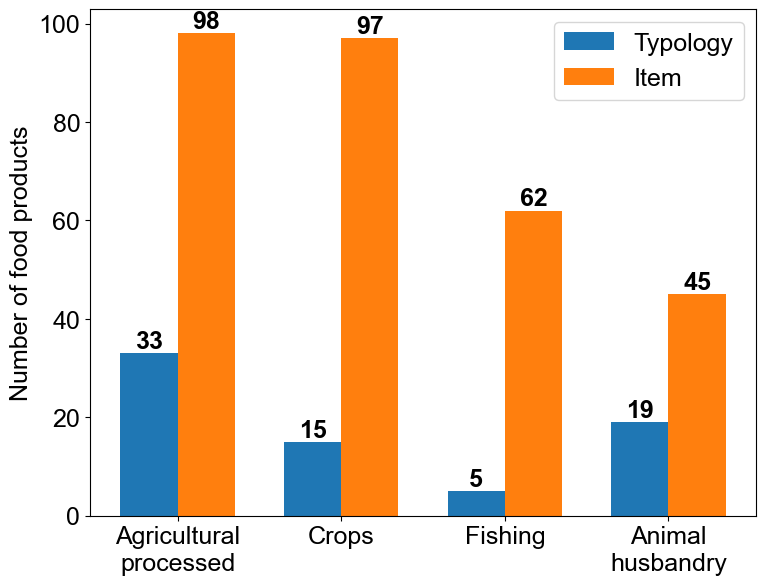

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6.2))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18

group_labels = ['Agricultural processed', 'Animal husbandry', 'Crops', 'Fishing']
# Modify the group labels to include a newline character
group_labels_modified = [label.replace(' ', '\n') for label in group_labels]

typology_counts = results_df['Typology Count']
item_counts = results_df['Item Count']

sorted_indices = np.argsort(item_counts)[::-1]  # Sort indices in decreasing order

x = np.arange(len(group_labels_modified))
bar_width = 0.35

plt.bar(x, typology_counts[sorted_indices], width=bar_width, label='Typology')
plt.bar(x + bar_width, item_counts[sorted_indices], width=bar_width, label='Item')

plt.ylabel('Number of food products')
plt.xticks(x + bar_width/2, np.array(group_labels_modified)[sorted_indices])
plt.legend()

# Adding values above each bar
for i, v in enumerate(typology_counts[sorted_indices]):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(item_counts[sorted_indices]):
    plt.text(i + bar_width, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Github-SustainableFoodDB/Plots/Data_Analysis/Sueatable_analysis_typo_item_bar.jpeg", bbox_inches='tight', dpi=300)

plt.show()
